In [2]:
!pip install rasterio

In [3]:
import rasterio as rs

In [4]:
im = rs.open("/content/image_2016-01-03.tiff")
arr = im.read()
arr.shape

(12, 745, 747)

In [5]:
import rasterio.plot as rp
import numpy as np

def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

arr = np.arange(255, dtype=np.float32)
print(np.all(rp.adjust_band(arr) == norm(arr)))

True


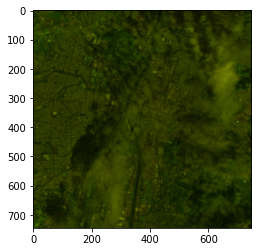

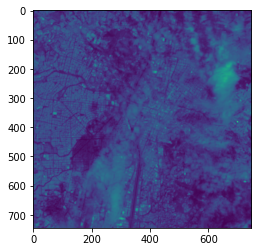

In [6]:
from rasterio.plot import show

#to display RGB
dataset = rs.open('/content/image_2016-01-03.tiff')
show(dataset.read([1,2,3]))


show(dataset.read(1))

In [7]:
src = rs.open('/content/image_2016-01-03.tiff')
image = src.read()

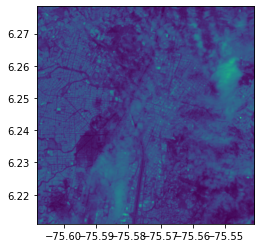

In [8]:
import rasterio
from rasterio.plot import show
import numpy as np
import os
%matplotlib inline

# Data dir


# Filepath

# Open the file:
raster = rs.open("/content/image_2016-01-03.tiff")

# Plot band 1
show((raster, 1))

Text(0.5, 1.0, 'Blue')

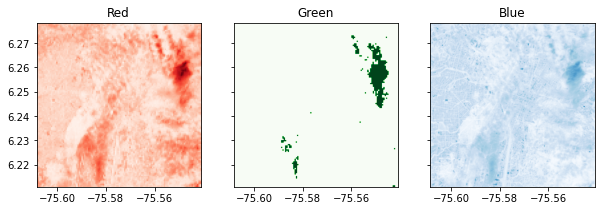

In [9]:

import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 4), cmap='Reds', ax=ax1)
show((raster, 3), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

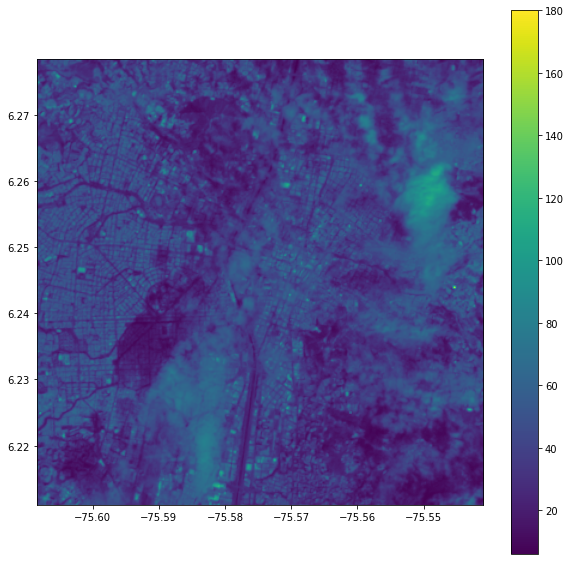

In [10]:
dem = rasterio.open("/content/image_2016-01-03.tiff")
fig, ax = plt.subplots(figsize=(10,10))
image_hidden = ax.imshow(dem.read()[0])
fig.colorbar(image_hidden, ax=ax)
rasterio.plot.show(dem, ax=ax)

In [11]:
!pip install rioxarray

In [12]:
def extract_along_line(xarr, line, n_samples=256):
    profile = []

    for i in range(n_samples):
        # get next point on the line
        point = line.interpolate(i / n_samples - 1., normalized=True)
        # access the nearest pixel in the xarray
        value = xarr.sel(x=point.x, y=point.y, method="nearest").data
        profile.append(value)
        
    return profile

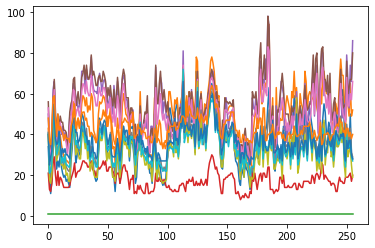

In [13]:
import rioxarray
import shapely.geometry
import matplotlib.pyplot as plt

sample_tif = ('/content/image_2016-01-03.tiff')

# Load xarray
tile = rioxarray.open_rasterio(sample_tif).squeeze()
# create a line (here its the diagonal of tile)
line = shapely.geometry.MultiLineString([[
            [tile.x[-1],tile.y[-1]],
            [tile.x[0], tile.y[0]]]])

# use the method from above to extract the profile
profile = extract_along_line(tile, line)
plt.plot(profile)
plt.show()

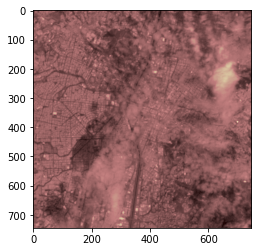

In [14]:
import rasterio
src = rasterio.open('/content/image_2016-01-03.tiff')
from matplotlib import pyplot
array = src.read()
pyplot.imshow(array[0], cmap='pink')

In [15]:
import numpy


ds = rs.open("/content/image_2016-01-03.tiff")
array = ds.read(1) # Type depends on the type you want for the average.
avg = numpy.average(array)
print(avg)

39.58842978176689


In [16]:
for x in range (0,340,1):
    for y in range(0,480,1):
        color = ds.read()
        print(color.mean())

Streaming output truncated to the last 5000 lines.
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.81800056302765
37.8180005630

KeyboardInterrupt: ignored

In [18]:
pix_val = list(ds.read())
a = []
for x in pix_val:
  a.append(x)
  print(x) 

[[45 39 39 ... 25 31 31]
 [45 39 39 ... 25 31 31]
 [48 36 36 ... 20 32 32]
 ...
 [31 34 34 ... 22 22 27]
 [29 36 36 ... 26 26 34]
 [29 36 36 ... 26 26 34]]
[[61 59 59 ... 40 46 46]
 [61 59 59 ... 40 46 46]
 [65 59 59 ... 34 46 46]
 ...
 [60 68 68 ... 29 29 32]
 [60 72 72 ... 35 35 43]
 [60 72 72 ... 35 35 43]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[20 20 20 ... 18 18 18]
 [20 20 20 ... 18 18 18]
 [20 20 20 ... 18 18 18]
 ...
 [25 25 25 ... 13 13 13]
 [26 26 26 ... 21 21 21]
 [26 26 26 ... 21 21 21]]
[[ 64  75  71 ...  57  58  57]
 [ 69  66  76 ...  53  53  52]
 [ 64  65  78 ...  45  50  53]
 ...
 [ 94 102  93 ...  33  33  34]
 [101 107  96 ...  39  39  39]
 [ 98 106  94 ...  46  48  50]]
[[ 65  73  73 ...  52  55  55]
 [ 65  73  73 ...  52  55  55]
 [ 68  79  79 ...  47  57  57]
 ...
 [ 89  97  97 ...  43  43  46]
 [100  99  99 ...  48  48  56]
 [100  99  99 ...  48  48  56]]
[[58 64 64 ... 47 50 50]
 [5

In [19]:
ds.read()

array([[[45, 39, 39, ..., 25, 31, 31],
        [45, 39, 39, ..., 25, 31, 31],
        [48, 36, 36, ..., 20, 32, 32],
        ...,
        [31, 34, 34, ..., 22, 22, 27],
        [29, 36, 36, ..., 26, 26, 34],
        [29, 36, 36, ..., 26, 26, 34]],

       [[61, 59, 59, ..., 40, 46, 46],
        [61, 59, 59, ..., 40, 46, 46],
        [65, 59, 59, ..., 34, 46, 46],
        ...,
        [60, 68, 68, ..., 29, 29, 32],
        [60, 72, 72, ..., 35, 35, 43],
        [60, 72, 72, ..., 35, 35, 43]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       ...,

       [[36, 30, 29, ..., 36, 36, 36],
        [35, 36, 29, ..., 34, 35, 34],
        [39, 40, 30, ..., 30, 32, 35],
        ...,
        [27, 28, 30, ..., 26, 26, 26],
        [26, 28, 30, ..., 31, 31, 33],
        [26, 28, 30, ..., 36, 37

In [ ]:
for x in range (0,340,1):
    for y in range(0,480,1):
        color = ds.read()
        print(color)

Streaming output truncated to the last 5000 lines.
  [34 34 34 ... 48 48 48]
  [34 34 34 ... 48 48 48]]]
[[[45 39 39 ... 25 31 31]
  [45 39 39 ... 25 31 31]
  [48 36 36 ... 20 32 32]
  ...
  [31 34 34 ... 22 22 27]
  [29 36 36 ... 26 26 34]
  [29 36 36 ... 26 26 34]]

 [[61 59 59 ... 40 46 46]
  [61 59 59 ... 40 46 46]
  [65 59 59 ... 34 46 46]
  ...
  [60 68 68 ... 29 29 32]
  [60 72 72 ... 35 35 43]
  [60 72 72 ... 35 35 43]]

 [[ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  ...
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]]

 ...

 [[36 30 29 ... 36 36 36]
  [35 36 29 ... 34 35 34]
  [39 40 30 ... 30 32 35]
  ...
  [27 28 30 ... 26 26 26]
  [26 28 30 ... 31 31 33]
  [26 28 30 ... 36 37 40]]

 [[37 29 30 ... 41 41 41]
  [36 37 31 ... 38 38 37]
  [41 40 30 ... 35 36 39]
  ...
  [26 27 28 ... 29 29 30]
  [27 27 28 ... 34 34 33]
  [27 27 29 ... 39 40 41]]

 [[42 42 42 ... 41 41 41]
  [42 42 42 ... 41 41 41]
  [42 42 42 ... 4